In [ ]:
#import statments
from google.colab import drive
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


### Dataset Information
*   [Source: Breast Cancer Wisconsin (Diagnostic) | UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)
*   Motivation: This dataset presents a binary classification task of predicting whether a tumor is malignant or benign. It has 37 citations which deemed it trustworth and usable. Upon closer inspection, the dataset is remarkably clean and has no missing values. This reduces the amount of preprocessing needed which is why this dataset was selected.

*   Overall Structure:
    *   Instances: 569
    *   Features:   ID, Target, 30 features that are extracted from images of cell-nuclei (texture, radis, area, etc.)
*   Target Variable: Diagnosis (M = Maglignant, B = Benign)
*   Data Types: Categorical and Continuous (numerical, float64)









In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load the data
dataset_path = '/content/drive/MyDrive/breast+cancer+wisconsin+diagnostic/wdbc.data'

columns = [
    'ID', 'Diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv(dataset_path, header=None, names=columns)
print("✅ Data loaded")
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Data loaded


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Preprocessing
Since the dataset is complete without any missing values, the only column that needs to be removed is the ID column, as it will not be necessary.

The Diagnosis column needs to be encoded, M (malignant) will become 1 while B (benign ) become 0.

In [ ]:
# Drop the ID column
df.drop('ID', axis=1, inplace=True)

# Encode the Diagnosis column
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

print("✅ Preprocessing complete")
display(df.head())

✅ Preprocessing complete


,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


###Dataset Split
The dataset was split into 66% for training and 34% for testing, totaling 376 samples for training and 193 samples for testing, in order to closely match the prior work's split and allow an accurate comparison between the models. The prior work used a dataset of 683 samples, split into 456 evaluation samples (66.76%) for training and 227 validation samples (33.24%) for testing, so the percentage breakdown is similar despite the difference in total sample size. It is not clear why the same dataset has less instances now.

In [ ]:
# Total dataset size
total_samples = 569

# Define the split size for training (66%) and testing (34%) to reflect the prior work's split of 456/683 and 227/683
test_samples = total_samples - train_samples
train_data, test_data = train_test_split(df, test_size=test_samples, random_state=42)

# Display the split information to double check
print(f"Total Samples: {total_samples}")
print(f"Training Samples: {len(train_data)} (66%)")
print(f"Test Samples: {len(test_data)} (34%)")


Total Samples: 569
Training Samples: 375 (66%)
Test Samples: 194 (34%)


### 1. Logistic Regression


Logistic Regression without Hyperparameter Tuning
Accuracy: 0.9691
Sensitivity (Recall): 0.9710
Specificity: 0.9680
---------------
Precision: 0.9437
Recall: 0.9710
F1-Score: 0.9571
ROC-AUC: 0.9695

Classification Report (without hyperparameters):
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       125
           1       0.94      0.97      0.96        69

    accuracy                           0.97       194
   macro avg       0.96      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194


Confusion Matrix (without hyperparameters):


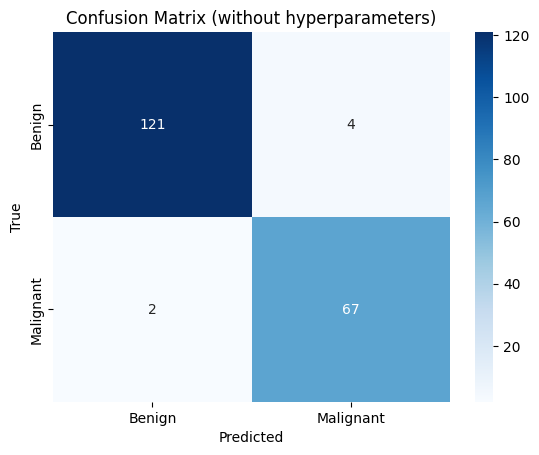


Best Hyperparameters (GridSearchCV): {'C': 100, 'max_iter': 100, 'solver': 'liblinear', 'tol': 0.0001}

Logistic Regression with Hyperparameter Tuning
Accuracy: 0.9639
Sensitivity (Recall): 0.9710
Specificity: 0.9600
---------------
Precision: 0.9306
Recall: 0.9710
F1-Score: 0.9504
ROC-AUC: 0.9655

Classification Report (with hyperparameters):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       125
           1       0.93      0.97      0.95        69

    accuracy                           0.96       194
   macro avg       0.96      0.97      0.96       194
weighted avg       0.96      0.96      0.96       194


Confusion Matrix (with hyperparameters):


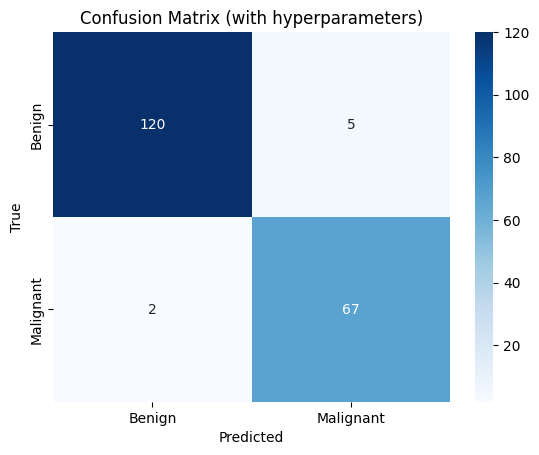

In [ ]:

# Model 1: Logistic Regression without Hyperparameter Tuning
# Separate features and target variable
X_train = train_data.drop('Diagnosis', axis=1)  # Features (without the target column)
y_train = train_data['Diagnosis']  # Target variable (Diagnosis)
X_test = test_data.drop('Diagnosis', axis=1)  # Features for testing
y_test = test_data['Diagnosis']  # Target variable for testing

# Initialize Logistic Regression model without hyperparameter tuning
log_reg = LogisticRegression(max_iter=10000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)

# Extract True Positives, False Positives, True Negatives, and False Negatives from the confusion matrix
TP = cm[1, 1]  # Malignant predicted as Malignant
TN = cm[0, 0]  # Benign predicted as Benign
FP = cm[0, 1]  # Benign predicted as Malignant
FN = cm[1, 0]  # Malignant predicted as Benign

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Sensitivity (Recall, True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results for the model without hyperparameter tuning
print("\nLogistic Regression without Hyperparameter Tuning")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print("---------------")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report (without hyperparameters):")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix (without hyperparameters):")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (without hyperparameters)')
plt.show()

######################################################################################
# Model 2: Logistic Regression with Hyperparameter Tuning

# Define the hyperparameters for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],  # Additional solvers
    'max_iter': [100, 200, 500, 1000],  # Different iteration counts
    'tol': [1e-4, 1e-5, 1e-6]  # Adjusting tolerance for convergence
}

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters (GridSearchCV): {best_params}")

# Get the best Logistic Regression model from the grid search
best_log_reg = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_log_reg.predict(X_test)

# Calculate the confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Extract True Positives, False Positives, True Negatives, and False Negatives from the confusion matrix
TP_best = cm_best[1, 1]
TN_best = cm_best[0, 0]
FP_best = cm_best[0, 1]
FN_best = cm_best[1, 0]

# Calculate Accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)

# Calculate Sensitivity (Recall, True Positive Rate)
sensitivity_best = TP_best / (TP_best + FN_best)

# Calculate Specificity (True Negative Rate)
specificity_best = TN_best / (TN_best + FP_best)

# Calculate Precision, Recall, F1-Score
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# ROC-AUC
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the results for the best hyperparameter-tuned model
print("\nLogistic Regression with Hyperparameter Tuning")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Sensitivity (Recall): {sensitivity_best:.4f}")
print(f"Specificity: {specificity_best:.4f}")
print("---------------")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")
print(f"ROC-AUC: {roc_auc_best:.4f}")
print("\nClassification Report (with hyperparameters):")
print(classification_report(y_test, y_pred_best))
print("\nConfusion Matrix (with hyperparameters):")
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (with hyperparameters)')
plt.show()



### K-Nearest Neighbors (KNN)


K-Nearest Neighbors without Hyperparameter Tuning
Accuracy: 0.9536
Sensitivity (Recall): 0.9420
Specificity: 0.9600
---------------
Precision: 0.9286
Recall: 0.9420
F1-Score: 0.9353
ROC-AUC: 0.9510

Classification Report (without hyperparameters):
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       125
           1       0.93      0.94      0.94        69

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194


Confusion Matrix (without hyperparameters):


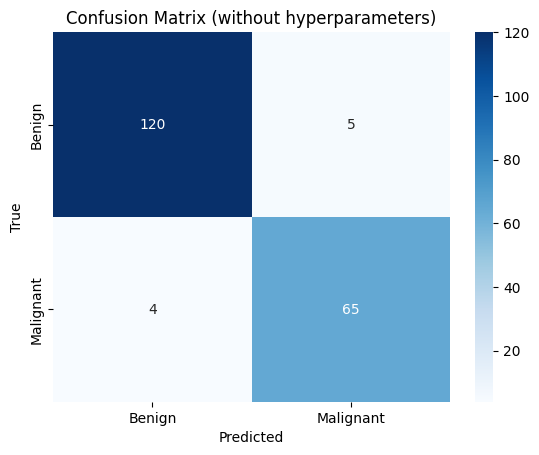


Best Hyperparameters (GridSearchCV): {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

K-Nearest Neighbors with Hyperparameter Tuning
Accuracy: 0.9639
Sensitivity (Recall): 0.9420
Specificity: 0.9760
---------------
Precision: 0.9559
Recall: 0.9420
F1-Score: 0.9489
ROC-AUC: 0.9590

Classification Report (with hyperparameters):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       125
           1       0.96      0.94      0.95        69

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194


Confusion Matrix (with hyperparameters):


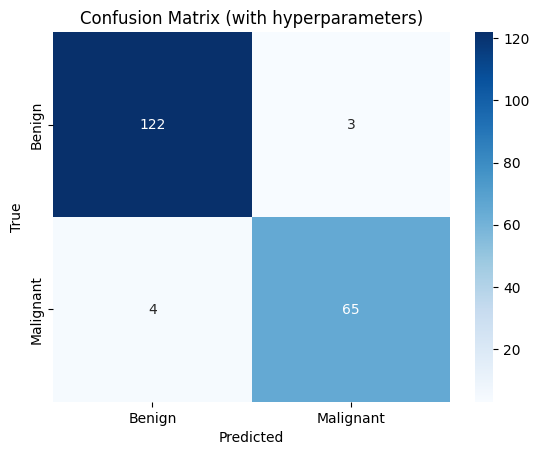

In [ ]:
# Model 1: K-Nearest Neighbors (KNN) without Hyperparameter Tuning

# Initialize KNN model without hyperparameter tuning
knn = KNeighborsClassifier()  # Default is K=5

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model performance
cm = confusion_matrix(y_test, y_pred)

# Extract True Positives, False Positives, True Negatives, and False Negatives from the confusion matrix
TP = cm[1, 1]  # Malignant predicted as Malignant
TN = cm[0, 0]  # Benign predicted as Benign
FP = cm[0, 1]  # Benign predicted as Malignant
FN = cm[1, 0]  # Malignant predicted as Benign

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Sensitivity (Recall, True Positive Rate)
sensitivity = TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)

# Print the results for the model without hyperparameter tuning
print("\nK-Nearest Neighbors without Hyperparameter Tuning")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print("---------------")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
print("\nClassification Report (without hyperparameters):")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix (without hyperparameters):")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (without hyperparameters)')
plt.show()

######################################################################################
# Model 2: K-Nearest Neighbors (KNN) with Hyperparameter Tuning

# Define the hyperparameters for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values of K (neighbors)
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Initialize KNN model
knn = KNeighborsClassifier()

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
best_params = grid_search.best_params_
print(f"\nBest Hyperparameters (GridSearchCV): {best_params}")

# Get the best KNN model from the grid search
best_knn = grid_search.best_estimator_

# Make predictions using the best model
y_pred_best = best_knn.predict(X_test)

# Calculate the confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Extract True Positives, False Positives, True Negatives, and False Negatives from the confusion matrix
TP_best = cm_best[1, 1]
TN_best = cm_best[0, 0]
FP_best = cm_best[0, 1]
FN_best = cm_best[1, 0]

# Calculate Accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)

# Calculate Sensitivity (Recall, True Positive Rate)
sensitivity_best = TP_best / (TP_best + FN_best)

# Calculate Specificity (True Negative Rate)
specificity_best = TN_best / (TN_best + FP_best)

# Calculate Precision, Recall, F1-Score
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# ROC-AUC
roc_auc_best = roc_auc_score(y_test, y_pred_best)

# Print the results for the best hyperparameter-tuned model
print("\nK-Nearest Neighbors with Hyperparameter Tuning")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Sensitivity (Recall): {sensitivity_best:.4f}")
print(f"Specificity: {specificity_best:.4f}")
print("---------------")
print(f"Precision: {precision_best:.4f}")
print(f"Recall: {recall_best:.4f}")
print(f"F1-Score: {f1_best:.4f}")
print(f"ROC-AUC: {roc_auc_best:.4f}")
print("\nClassification Report (with hyperparameters):")
print(classification_report(y_test, y_pred_best))
print("\nConfusion Matrix (with hyperparameters):")
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (with hyperparameters)')
plt.show()

###References

*   Sidey-Gibbons, J.A., & Sidey-Gibbons, C.J. (2019). Machine learning in medicine: a practical introduction. BMC Medical Research Methodology, 19.

*   Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

